# ASSIGNMENT 4 (SUB:EE524) : submitted by JYOTIRMOY DEKA

Q.1.(a). 

Let us consider x to be a random variable, where x ∈ [-10,10]. Generate 100 samples of x and plot the pdf of x for x∼ N(0, 1) and x∼ N(3, 2).Comment on the difference in plot. If there is a difference in magnitude, comment why?

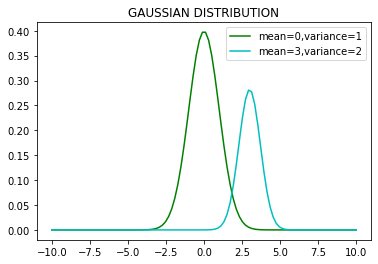

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.linspace(-10,10,100)     # generating 100 random values of x over the interval

mean1 = 0                          
variance1= 1
pdf1 = np.exp(-np.square(x-mean1)/2*variance1)/ (np.sqrt(2*np.pi*variance1))   # pdf of first set of values of mean and variance


mean2 = 3
variance2 = 2
pdf2 = np.exp(-np.square(x-mean2)/2*variance2)/ (np.sqrt(2*np.pi*variance2))   # pdf of first set of values of mean and variance

plt.title('GAUSSIAN DISTRIBUTION')                           
plt.plot(x,pdf1,'g',label='mean=0,variance=1')
plt.plot(x,pdf2,'c',label='mean=3,variance=2')
plt.legend()
plt.show()                                          # plots of both the PDFs



##difference between the plots show that :
# 1.with higher value of mean,the plot shift rightwards
# 2. with higher value of variance, the bell shape of the plot becomes widespreaded.
# 3. there exist a difference in magnitude of the curves, and it varies inersely with the variance of the distribution.

Q.1.(b).

Consider the two-dimensional normal distribution p(x|w) ∼ N(µ, Σ)
where µ =(0,0) and Σ = (1,0.6,0.6,2) . Let x be a random vector defined by x =(x1,x2), where xi ∈ [−10, 10]. 

Plot the surface plot and contour plot of the pdf.

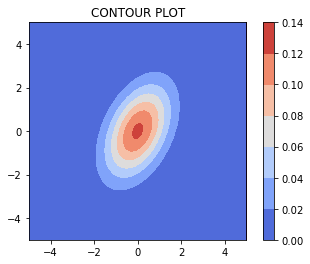

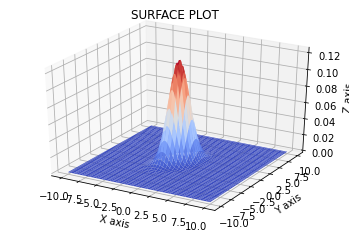

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu=np.array([0,0]).reshape(2,)       # mean matrix
cov = np.array([1 ,0.6, 0.6 ,2]).reshape(2,2)  # covariance matrix

#Create grid and multivariate normal
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

X, Y = np.meshgrid(x,y)

dis = np.empty(X.shape + (2,))    # array creation as per copatible shape
dis[:, :, 0] = X;
dis[:, :, 1] = Y;
gauss = multivariate_normal(mu,cov)   # defining the gaussian distribution



# contour plot
z = gauss.pdf(dis)
cs=plt.contourf(X,Y,z,cmap='coolwarm')
plt.imshow(z,extent=[-5,5,-5,5])          # changing the extent of the axes
cbar=plt.colorbar(cs)
plt.title('CONTOUR PLOT')
plt.show()

# surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, gauss.pdf(dis),cmap='coolwarm',linewidth=4)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('SURFACE PLOT')
plt.show()

Q.2. Classify the iris flower dataset using a Naive Bayes Classifier. Link to download the dataset is here. The dataset consists of 3 classes and has 150 data samples. Each data sample has 4 features and a class label. The details related to the dataset can be found here.
Consider 70% of the data as training samples and the rest as testing samples.Display the predicted labels and the true labels. Also, calculate the accuracy of your prediction.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('iris.csv')  # Importing the dataset from the given file

print(df)


### as we see each of the 3 classes of iris dataset has equal number of elements(each class with 50), hence, the PRIORI probability of each class would be 1/3.
### PRIORI PROBABILITY of (iris-setosa) = PRIORI PROBABILITY of (iris-versicolor) = PRIORI PROBABILITY of (iris-virginica) = 1/3

X = df.iloc[:,:4].values     # assigning independent variables to X
y = df['Unnamed: 4'].values   # assigning dependent variable'unnamed:4' to Y



from sklearn.model_selection import train_test_split    # Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70)  # 70% dataset used for training set, 30% for test set



from sklearn.naive_bayes import GaussianNB     # Fitting Naive Bayes Classification to the Training set by using GaussianNB class
classifier = GaussianNB()                      # assign GaussianNB class to variable'classifier'
classifier.fit(X_train, y_train)               # fitting X and Y values for training 



y_pred = classifier.predict(X_test)     # Predicting the values of the Test set 

y_compare = pd.DataFrame({'true values':y_test,'predicted values':y_pred})  #comparing the true and predicted values side by side
y_compare    # displaying the dataframe with comparison 

     Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3      Unnamed: 4
0           5.1         3.5         1.4         0.2     Iris-setosa
1           4.9         3.0         1.4         0.2     Iris-setosa
2           4.7         3.2         1.3         0.2     Iris-setosa
3           4.6         3.1         1.5         0.2     Iris-setosa
4           5.0         3.6         1.4         0.2     Iris-setosa
..          ...         ...         ...         ...             ...
145         6.7         3.0         5.2         2.3  Iris-virginica
146         6.3         2.5         5.0         1.9  Iris-virginica
147         6.5         3.0         5.2         2.0  Iris-virginica
148         6.2         3.4         5.4         2.3  Iris-virginica
149         5.9         3.0         5.1         1.8  Iris-virginica

[150 rows x 5 columns]


,true values,predicted values
0,Iris-virginica,Iris-virginica
1,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-virginica,Iris-virginica
9,Iris-virginica,Iris-virginica


the confusion matrix is : [[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]



Correct predictions:  42


False predictions:  3


Accuracy of the Naive Bayes Clasification is:  0.9333333333333333


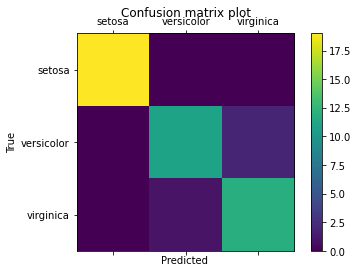

In [9]:
from sklearn.metrics import confusion_matrix          # finding the confusion matrix
confumat = confusion_matrix(y_test, y_pred)
print('the confusion matrix is :',confumat)
   
    
#calculating accuracy from the confusion matrix
a = confumat.shape                              
correctPrediction = 0                       # initializing values 
falsePrediction = 0
for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            correctPrediction +=confumat[row,c]
        else:
            falsePrediction += confumat[row,c]
print('\n\n\nCorrect predictions: ', correctPrediction)
print('\n\nFalse predictions: ', falsePrediction)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', correctPrediction/(confumat.sum()))





labels = ['setosa','versicolor','virginica']          # plotting of the confusion matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confumat)
plt.title('Confusion matrix plot')
fig.colorbar(cax)
ax.set_xticklabels(['']+ labels )
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted ')
plt.ylabel('True')
plt.show()